# **Advances in Data Sciences and Architecture**
## Name : **Rohan Kapadnis**
## NUID : **1342161**
## Assignment : **Mini Project 1**

# **Main idea & Abstract of this Mini Project** 

### This project aims at demonstrating how to improve the quality of you machine learning models. This notebook will explain how to tackle categorical and numerical data types, how to use advanced techniques for model validation, how to avoid the problems of data leakage, as well as building pipeline to improve the code. And finally will demonstrate XGBoost which is one of the most widely used model in Kaggle.     



# **1. Introduction** 

## Here, we will be working with data from the "Houses Prices Competition for Kaggle Learn Users" for the demonstration. 



## The Data fields are as follows: 
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet


OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [ ]:
#pip install pandas

In [ ]:
#pip install numpy

In [ ]:
#pip install matplotlib

In [ ]:
#pip install seaborn

In [ ]:
#pip install sklearn

In [ ]:
#pip install xgboost

In [ ]:
import pandas as pd

In [ ]:
url_test = 'https://raw.githubusercontent.com/rohan-kapadnis/Advances-in-Data-Sciences-and-Architecture/master/Mini-Project%201/dataset/test.csv'
url_train = 'https://raw.githubusercontent.com/rohan-kapadnis/Advances-in-Data-Sciences-and-Architecture/master/Mini-Project%201/dataset/train.csv'

In [ ]:
#Read the data
X_full = pd.read_csv(url_train)
X_test_full = pd.read_csv(url_test)


In [ ]:
X_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **2. Handling missing values**

### **Approaches** : 
### 1) Drop Columns with missing values
      This is the simplest option. To drop columns with missing values. 
      But due to this method, model loses access to a lot of potentially useful information. 

### 2) Imputation : 
      Imputation fills in the missing vlues with some number. 
      For eg, we can fill in the mean value along each column. 
      The imputed value won't be exactly right in most cases, 
      but it usually leads to more accurate models than you would get from dropping the column entirely.


### 3) Extension to imputation : 
       In this approach, we impute the missing values, as before. 
       And, additionally, for each column with missing entries in the original dataset,
       we add a new column that shows the location of the imputed entries.







### **Hands on** :

In [ ]:
from sklearn.model_selection import train_test_split

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [ ]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,619,20,90.0,11694,9,5,2007,2007,452.0,48,0,1774,1822,1828,0,0,1828,0,0,2,0,3,1,9,1,2007.0,3,774,0,108,0,0,260,0,0,7,2007
870,871,20,60.0,6600,5,5,1962,1962,0.0,0,0,894,894,894,0,0,894,0,0,1,0,2,1,5,0,1962.0,1,308,0,0,0,0,0,0,0,8,2009
92,93,30,80.0,13360,5,7,1921,2006,0.0,713,0,163,876,964,0,0,964,1,0,1,0,2,1,5,0,1921.0,2,432,0,0,44,0,0,0,0,8,2009
817,818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,350,1568,1689,0,0,1689,1,0,2,0,3,1,7,2,2002.0,3,857,150,59,0,0,0,0,0,7,2008
302,303,20,118.0,13704,7,5,2001,2002,150.0,0,0,1541,1541,1541,0,0,1541,0,0,2,0,3,1,6,1,2001.0,3,843,468,81,0,0,0,0,0,1,2006


As you can see, there are a few MISSING VALUES!!!!

We will try to investigate them. 

In [ ]:
# Shape of training data 
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 37)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


As there are quite a few missing values, we will try to use imputation instead of dropping columns as that won't lose any valuable information. 

To compare these approaches, we will define a function called score_dataset() that will return Mean Absolute Error from a Random Forest Model




In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

## A. **Dropping column with missing values**  method

In [ ]:
#get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)                     

In [ ]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17952.591404109586


## B. **Imputation** method

In [ ]:
from sklearn.impute import SimpleImputer
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; putting them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [ ]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18250.608013698627


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   OverallQual    1168 non-null   int64  
 5   OverallCond    1168 non-null   int64  
 6   YearBuilt      1168 non-null   int64  
 7   YearRemodAdd   1168 non-null   int64  
 8   MasVnrArea     1162 non-null   float64
 9   BsmtFinSF1     1168 non-null   int64  
 10  BsmtFinSF2     1168 non-null   int64  
 11  BsmtUnfSF      1168 non-null   int64  
 12  TotalBsmtSF    1168 non-null   int64  
 13  1stFlrSF       1168 non-null   int64  
 14  2ndFlrSF       1168 non-null   int64  
 15  LowQualFinSF   1168 non-null   int64  
 16  GrLivArea      1168 non-null   int64  
 17  BsmtFullBath   1168 non-null   int64  
 18  BsmtHal

Given that thre are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely. However, we see that dropping columns performs slightly better! While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset. That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. For instance, consider the GarageYrBlt column (which indicates the year that the garage was built). It's likely that in some cases, a missing value could indicate a house that does not have a garage. Does it make more sense to fill in the median value along each column in this case? Or could we get better results by filling in the minimum value along each column? It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

# **3. Categorical Variables**

### Categorical variables are variables that take only limited number of values. 
#### eg. For a survey of gender the outcomes are Male and Female 

#### You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first. There are various approaches that can be used to prepare categorical data

 

### **Approaches** : 
### 1) Drop categorical variables
      The easiest approach to dealing with categorical variables is to simply remove them from the dataset. 
      This approach will only work well if the columns did not contain useful information. 


### 2) Label Encoding
      Label encoding assigns each unique value to a different integer.
      Not all categorical variables have a clear ordering in the values, 
      but we refer to those that do as ordinal variables.
      eg,  "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3)

### 3) One-Hot Encoding
      One-hot encoding creates new columns indicating the presence 
      (or absence) of each possible value in the original data.
   
![Screen Shot 2020-10-28 at 8 29 35 PM](https://user-images.githubusercontent.com/56054175/97792780-4eceaf80-1bb9-11eb-810e-c746f1a2c5a5.png)



```
One-hot encoding generally does not perform well if the 
categorical variable takes on a large number of values 
(i.e., you generally won't use it for variables taking more than 15 different values).
```



### **Hands on** :

## A. **Dropping column with categorical data**  method

In [ ]:
X = pd.read_csv(url_train)
X_test = pd.read_csv(url_test)
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)


In [ ]:
# Drop columns in training and validation data
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])



In [ ]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
17952.591404109586


## B. **Label Encoding**  method

In [ ]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['RoofMatl', 'SaleType', 'Functional', 'HeatingQC', 'LandSlope', 'Condition1', 'Heating', 'Utilities', 'Condition2', 'Foundation', 'Exterior1st', 'ExterCond', 'Exterior2nd', 'RoofStyle', 'Neighborhood']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder
label_encoder = LabelEncoder()
for col in set(good_label_cols):
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Label Encoding):
17675.942500000005


**Here, clearly Encoding performed better than Dropping Columns method**


We will try the One-Hot Encoding method next 

## C. **One-Hot Encoding**  method

####Finding the cardinality(number of unique entries in each column with categorical data) of the Categorical columns first 

In [ ]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

**Columns having high cardinality will pose a problem as they would expand the size of the dataset significantly. High cardinality columns can either be dropped from the dataset, or we can use label encoding.**

For our project, we will create one hot encoding for columns with cardinality less than 10

In [ ]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Exterior1st', 'Neighborhood', 'Exterior2nd']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
17514.224246575344


Hence, One hot encoding performs the best out of the 3 methods with least MAE. 

# **3. Pipelines**

###**Pipelines** are a simple way to keep your **data preprocessing and modeling code organized**. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

###Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

####**Cleaner Code**: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.

####**Fewer Bugs**: There are fewer opportunities to misapply a step or forget a preprocessing step.

####**Easier to Productionize**: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.



### **Hands on** :

In [ ]:
X_full = pd.read_csv(url_train)
X_test_full = pd.read_csv(url_test)
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [ ]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,New,Partial,619,20,90.0,11694,9,5,2007,2007,452.0,48,0,1774,1822,1828,0,0,1828,0,0,2,0,3,1,9,1,2007.0,3,774,0,108,0,0,260,0,0,7,2007
870,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,1Fam,1Story,Hip,CompShg,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,N,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,871,20,60.0,6600,5,5,1962,1962,0.0,0,0,894,894,894,0,0,894,0,0,1,0,2,1,5,0,1962.0,1,308,0,0,0,0,0,0,0,8,2009
92,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,None,TA,Gd,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,93,30,80.0,13360,5,7,1921,2006,0.0,713,0,163,876,964,0,0,964,1,0,1,0,2,1,5,0,1921.0,2,432,0,0,44,0,0,0,0,8,2009
817,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,350,1568,1689,0,0,1689,1,0,2,0,3,1,7,2,2002.0,3,857,150,59,0,0,0,0,0,7,2008
302,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,303,20,118.0,13704,7,5,2001,2002,150.0,0,0,1541,1541,1541,0,0,1541,0,0,2,0,3,1,6,1,2001.0,3,843,468,81,0,0,0,0,0,1,2006


###Step 1: **Define Preprocessing Steps**
We will use the ColumnTransformer class to bundle together different preprocessing steps. 

The code below:
 - imputes missing values in numerical data
 - imputes missing values and applies a one-hot encoding to categorical data.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])





###Step 2: **Define the model**
We will now define a random forest model with the familiar RandomForestRegressor class. 

In [ ]:
# Define model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)



###Step 3: **Create and Evaluate the Pipeline**

We use the Pipeline class to define a pipeline that bundles the preprocessing and modeling steps
 - With the pipeline, we preprocess the training data and fit the model in a single line of code

 - With the pipeline, we supply the unprocessed features in X_valid to the predict() command, and the pipeline automatically preprocesses the features before generating predictions.

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
from sklearn.metrics import mean_absolute_error
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17740.290308219177


Hence, pipelines are valuable for cleaning up machine learning code and avoiding errors, and are especially useful for workflows with sophisticated data preprocessing.

# **4. Cross-Validation**

### In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".


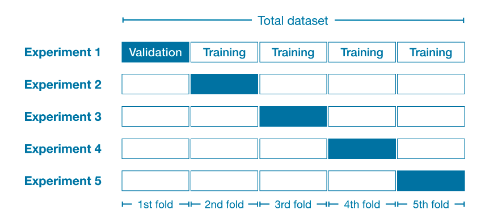

We then run one experiment on each fold

Cross-validation gives a more accurate measure of model quality, 
which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

**When should we use cross validation?**
 - For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.

 - For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.


### **Hands on** :

In [ ]:
# Read the data
train_data = pd.read_csv(url_train)
test_data = pd.read_csv(url_test)

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

Here for simplicity, we have dropped the categorical variables.

In [ ]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

The code below uses the **cross_val_score()** function to obtain the mean absolute error (MAE), averaged across five different folds. Recall we set the number of folds with the cv parameter.




In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18311.538589041094


Using cross-validation yields a much better measure of model quality, with the added benefit of cleaning up our code. We no longer need to keep track of separate training and validation sets. So, especially for small datasets, it's a good improvement!

# **5. XGBoost**

### This module will demonstrate how to build and optimize models with **gradient boosting**. This method dominates many Kaggle competitions and achieves state-of-the-art results on a variety of datasets.

Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

 - First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
 - These predictions are used to calculate a loss function (like mean squared error, for instance).
 - Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
 - Finally, we add the new model to ensemble, and ...
 - ... repeat!

![Screen Shot 2020-10-30 at 11 52 43 AM](https://user-images.githubusercontent.com/56054175/97792779-4e361900-1bb9-11eb-9682-29e5c3873ea6.png)

For our hands on we will be using **XGBoost**. It stands for **extreme gradient boosting**, which is an implementation of gradient boosting with several additional features focused on performance and speed. 

### **Hands on** :

In [ ]:
# Read the data
X = pd.read_csv(url_train)
X_test_full = pd.read_csv(url_test)

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

###Step 1: **Building the model**

XGBoost has a few parameters that can dramatically affect accuracy and training speed.

Firstly, we will build an XGBoost model using default parameters. 

In [ ]:
from xgboost import XGBRegressor
# Define the model
my_model_1 = XGBRegressor(random_state=0)

# Fit the model
my_model_1.fit(X_train, y_train)

[22:12:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = my_model_1.predict(X_valid)

In [ ]:
# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid)
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 16997.531464041094


Now its time to improve the model by changing the default parameters

###Step 2: **Improving the model**

To improve the model, we are going to change the default parameters. Some of the parameters that can be changed are 

1. **n_estimators** :
-   Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble
-  Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
-  Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).
-  Typical values range from 100-1000



2. **early_stopping_rounds** :
- Offers a way to automatically find the ideal value for n_estimators
- Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators
-  It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.
- When using early_stopping_rounds, you also need to set aside some data for calculating the validation scores - this is done by setting the eval_set parameter.


3. **learning_rate** : 
- Instead of getting predictions by simply adding up the predictions from each component model, we can multiply the predictions from each model by a small number (known as the learning rate) before adding them in.
- This means each tree we add to the ensemble helps us less. So, we can set a higher value for n_estimators without overfitting. If we use early stopping, the appropriate number of trees will be determined automatically.
- In general, **a small learning rate and large number of estimators will yield more accurate XGBoost models**, though it will also take the model longer to train since it does more iterations through the cycle. As default, XGBoost sets learning_rate=0.1.

4. **n_jobs** :
- On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. It's common to set the parameter n_jobs equal to the number of cores on your machine. On smaller datasets, this won't help.
- The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the fit command.

In [ ]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train, y_train)

# Get predictions
predictions_2 = my_model_2.predict(X_valid)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid)
print("Mean Absolute Error:" , mae_2)

[22:12:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 16375.472442208904


There is a drop in the error due to the addition of n_estimators and learning_rate

Playing the parameters to improve the performance. 

In [ ]:
# Define the model
my_model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.03)

# Fit the model
my_model_3.fit(X_train, y_train)

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_valid)
print("Mean Absolute Error:" , mae_3)

[22:12:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 16045.883842572774


Hence, XGBoost is a the leading software library for working with standard tabular data (the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). With careful parameter tuning, you can train highly accurate models.

## **EXTRA : XGBoost in parallel processing**
- In XGBoost, the parallelisation happens during the construction of each trees, at a very low level. Each independent branches of the tree are trained separately. 

- Hyperparameters tuning requires many branches per tree and many trees per model and several models per hyperparameters value and many hyperparameters values to be tested

- The XGBoost library for gradient boosting uses is designed for efficient multi-core parallel processing

- This allows it to efficiently use all of the CPU cores in your system when training

- The parallelism in gradient boosting can be implemented in the construction of individual trees, rather than in creating trees in parallel like random forest. This is because in boosting, trees are added to the model sequentially

- The speed of XGBoost is both in adding parallelism in the construction of individual trees, and in the efficient preparation of the input data to aid in the speed up in the construction of trees

- The XGBClassifier and XGBRegressor wrapper classes for XGBoost for use in scikit-learn provide the nthread parameter to specify the number of threads that XGBoost can use during training

- By default this parameter is set to -1 to make use of all of the cores in your system 


```
     model = XGBClassifier(nthread=-1)
```

 - Moreover, parallelisation has one main drawback: the overhead. Before any parallel computation, data has to be sent to each cores. 



# **6. Data Leakage**

### **Data leakage** (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.



There are two main types of leakage: 
1. Target leakage 
2. Train-test contamination

### Target Leakage
Target leakage occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.

### Train-Test contamination
A different type of leak occurs when you aren't careful to distinguish training data from validation data.

Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called train-test contamination.



For example, imagine you run preprocessing (like fitting an imputer for missing values) before calling train_test_split(). The end result? Your model may get good validation scores, giving you great confidence in it, but perform poorly when you deploy it to make decisions.


After all, you incorporated data from the validation or test data into how you make predictions, so the may do well on that particular data even if it can't generalize to new data. This problem becomes even more subtle (and more dangerous) when you do more complex feature engineering.



If your validation is based on a simple train-test split, exclude the validation data from any type of fitting, including the fitting of preprocessing steps. This is easier if you use scikit-learn pipelines. When using cross-validation, it's even more critical that you do your preprocessing inside the pipeline!




## **Conclusion**
Hence, this notebook demonstrated how to improve you machine learning models - how to tackle categorical and numerical data types, how to use advanced techniques for model validation, how to avoid the problems of data leakage, as well as building pipeline to improve the code

Also usage of XGBoost was demonstrated along with hands on code. This notebook also mentioned the how XGBoost uses parallel processing. 

## **Citations** 

https://www.kaggle.com/learn/intermediate-machine-learning

https://machinelearningmastery.com/best-tune-multithreading-support-xgboost-python/

https://medium.com/blablacar/thinking-before-building-xgboost-parallelization-f1a3f37b6e68

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://www.youtube.com/watch?v=OQKQHNCVf5k&ab_channel=SundogEducationwithFrankKane



## **Licensing** 


Copyright 2020 Rohan Kapadnis

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.